# 1. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# 2. Data Generation Function

In [3]:
def generate_cryogenic_data(
    start_time="2025-01-01 00:00:00", 
    periods=10000, 
    freq='1min', 
    base_temp=-196.0,
    noise_std=0.5,
    anomaly_ratio=0.01,
    missing_ratio=0.005,
    inconsistent_ratio=0.001,
    anomaly_magnitude=10
):
    timestamps = pd.date_range(start=start_time, periods=periods, freq=freq)
    temperature = np.random.normal(loc=base_temp, scale=noise_std, size=periods)

    # Add smooth random walk behavior
    for i in range(1, periods):
        temperature[i] += 0.5 * (temperature[i-1] - base_temp)

    # Inject anomalies
    anomaly_flags = np.zeros(periods)
    anomaly_indices = np.random.choice(periods, size=int(anomaly_ratio * periods), replace=False)
    temperature[anomaly_indices] += np.random.choice([-1, 1], size=len(anomaly_indices)) * anomaly_magnitude
    anomaly_flags[anomaly_indices] = 1

    # Inject missing values
    missing_indices = np.random.choice(periods, size=int(missing_ratio * periods), replace=False)
    temperature[missing_indices] = np.nan

    # Inject inconsistent values
    inconsistent_indices = np.random.choice(periods, size=int(inconsistent_ratio * periods), replace=False)
    temperature[inconsistent_indices] = np.random.choice([50.0, 70.0, 100.0], size=len(inconsistent_indices))  # unrealistic hot values

    # Final DataFrame
    df = pd.DataFrame({
        "Timestamp": timestamps,
        "Temperature (°C)": temperature,
        "Anomaly": anomaly_flags.astype(int)
    })

    return df

# 3. Generate Dataset

In [4]:
df = generate_cryogenic_data()

# 4. Save Dataset

In [5]:
import os
os.makedirs('data', exist_ok=True)
df.to_csv('data/cryogenic_synthetic.csv', index=False)
print("✅ Synthetic cryogenic dataset generated and saved at 'data/cryogenic_synthetic.csv'.")

✅ Synthetic cryogenic dataset generated and saved at 'data/cryogenic_synthetic.csv'.


# 5. Quick Overview

In [6]:
print(df.head())

            Timestamp  Temperature (°C)  Anomaly
0 2025-01-01 00:00:00       -196.672656        0
1 2025-01-01 00:01:00       -196.219367        0
2 2025-01-01 00:02:00       -196.910405        0
3 2025-01-01 00:03:00       -196.488600        0
4 2025-01-01 00:04:00       -196.359485        0


# 6. Plot Raw Temperature Data

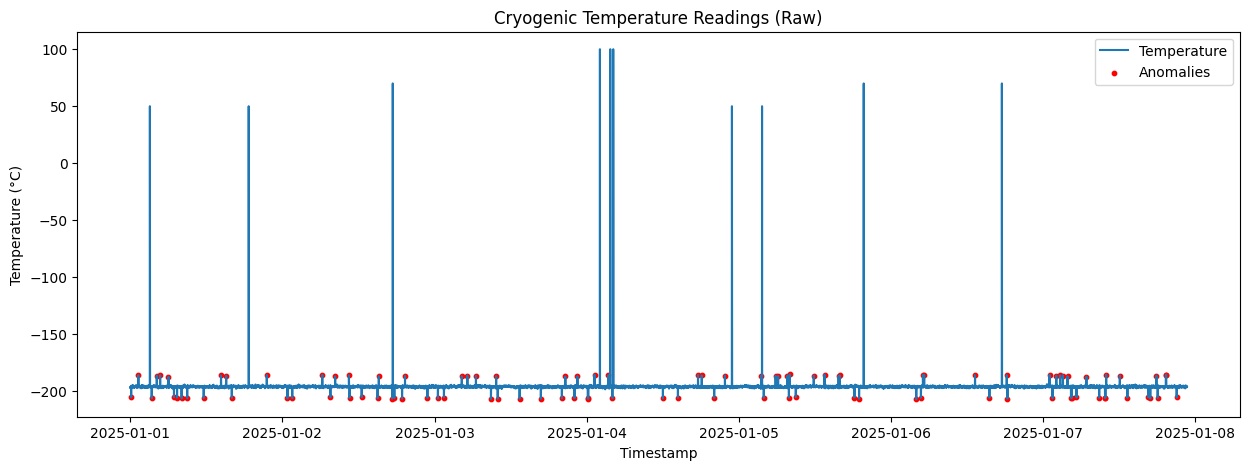

In [7]:
plt.figure(figsize=(15,5))
plt.plot(df['Timestamp'], df['Temperature (°C)'], label='Temperature')
plt.scatter(df.loc[df['Anomaly'] == 1, 'Timestamp'], df.loc[df['Anomaly'] == 1, 'Temperature (°C)'], color='red', label='Anomalies', s=10)
plt.title('Cryogenic Temperature Readings (Raw)')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()